# Homework 6 solutions

In [1]:
%cd '/home/cody/Physics 331/331 Homework (Cody)/HW 6 Eulers Method'
%ls

/home/cody/Physics 331/331 Homework (Cody)/HW 6 Eulers Method
 dVdx.py          euler_1d.py      'Homework 6 Solutions.ipynb'   V_sphere.py
 efld_plate.py   'Homework 6.aux'  'Homework 6.synctex.gz'        V_total.py
 efld_sphere.py  'Homework 6.log'  'Homework 6.tex'
 efld_total.py   'Homework 6.pdf'   V_plate.py


In [2]:
# %load efld_plate.py
def efld_plate(x):
    """
    Finds the 1d electric field from parallel plates with uniform charge density
    sigma

    Inputs
    ----------
    x:  Place where I want to find the electric field

    Outputs
    ----------
    E:  Electric field at point x (N/C)
    """
    d = 1e-2 #Distacne between the plates
    eps = 8.854187817e-12 #Permittivity constant (F/m)
    sigma = 1.2e-3 #Charge density (C/m^2)

    return -sigma/eps #Minus sign becasue field should point negative in our region


In [3]:
# %load efld_sphere.py
def efld_sphere(x):
    """
    Finds the 1d electric field from a shell of charges

    Inputs
    ----------
    x:  Place where I want to find the electric field

    Outputs
    ----------
    E:  Electric field at point x (N/C)
    """
    a = 0.273e-2    #Where the center of the sphere is located
    R = 0.146e-2    #Radius of the sphere
    Q = 0.24e-6     #Charge on the spherical shell (C)
    d = 1e-2        #End of the region I care about
    k = 9e9        #Coulomb constant (N*m**2 / C**2)
    if x <= a - R:  #Left of the sphere
        return -k * Q / (a-x)**2
    elif x >= a + R:#Right of the sphere
        return  k * Q / (x-a)**2
    else:           #In the sphere
        return  0


In [4]:
# %load efld_total.py
def efld_total(x):
    """
    Finds the total efild from the parallel plates and the spherical shell of
    charge

    Inputs
    ----------
    x:  Where I want to know the electric field (m)

    Output
    ----------
    E:  Electric field (N/C)
    """

    return efld_sphere(x) + efld_plate(x)


In [5]:
# %load dVdx.py
def dVdx(V,x):
    """
    Differential I want to put into euler_1d to find the potential

    Inputs
    ----------
    V:  Potential, this is the dependent variable, it's not used but needed for
        euler_1d
    x:  Possition, dependent variable

    Output
    ----------
    dV: dV/dx
    """
    return -1*efld_total(x)


In [6]:
# %load euler_1d.py
import numpy as np
def euler_1d(y0, t0, tf, dt, deriv_func):
    """
    Numerically solve the first order ODE deriv_func using Eulers method

    Inputs
    ----------
    y0:         Starting dependent-variable value
    t0, tf:     Starting and ending independent-variable value
    dt:         Size of the step I want to take.
    deriv_func: Function that I am trying to numerically solve.

    Outputs
    ----------
    t: Array of independent-variable values
        t = [t[0], t[1], t[2], ..., t[n_steps]]
    y: Array of corresponding dependent-variable values
        y = [y[0], y[1], y[2], ..., y[n_steps]]
    """

    t = np.arange(t0, tf+dt, dt)   #starts at t0 and makes steps of size dt. Does not
                                   #get to tf. It gets as Close as it can to tf, but
                                   #will always stop short of it.
    n_steps = len(t)        #Number of steps to take
    y = np.zeros(n_steps)   #I want to make an array of zeros that I'll then put
                            #y-values into. This is a good practice because it
                            #forces the computer to allocate enough memory for the
                            #final answer and can prevent memory problems
 
    #Set the first element of the array to be our input starting value y0
    y[0] = y0
    for n in range(n_steps-1):
        f = deriv_func(y[n], t[n])  #Evaluate the function f(y,t)
        y[n+1] = (y[n] + dt * f)    #This is the Euler's method part.
    return t, y

As a sanity check I want to plot the individual electric fields first to make sure things look right. But I can't just plug it into plt.plot because the plot function can't handle the if statements inside functions. So I'm going to make a for loop to find all of the values first, and then put that into plot.

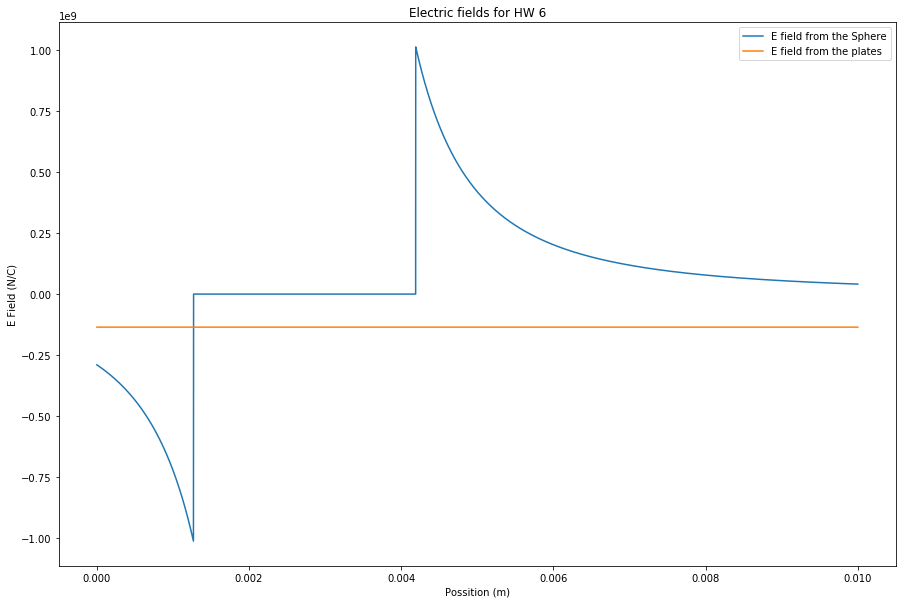

In [16]:
import matplotlib.pyplot as plt
x = np.linspace(0,1e-2, 10000)
E_sphere = []
E_plate = []
for i in x:
    E_sphere.append(efld_sphere(i))
    E_plate.append(efld_plate(i))
plt.figure(figsize = (15,10))
plt.plot(x,E_sphere, label = 'E field from the Sphere')
plt.plot(x,E_plate, label = 'E field from the plates')

plt.title("Electric fields for HW 6")
plt.xlabel('Possition (m)')
plt.ylabel('E Field (N/C)')
plt.legend()
plt.show()

In [18]:
x, V = euler_1d(0, 0, 1e-2, 1e-3, dVdx )
x2, V2 = euler_1d(0, 0, 1e-2, 1e-4, dVdx )

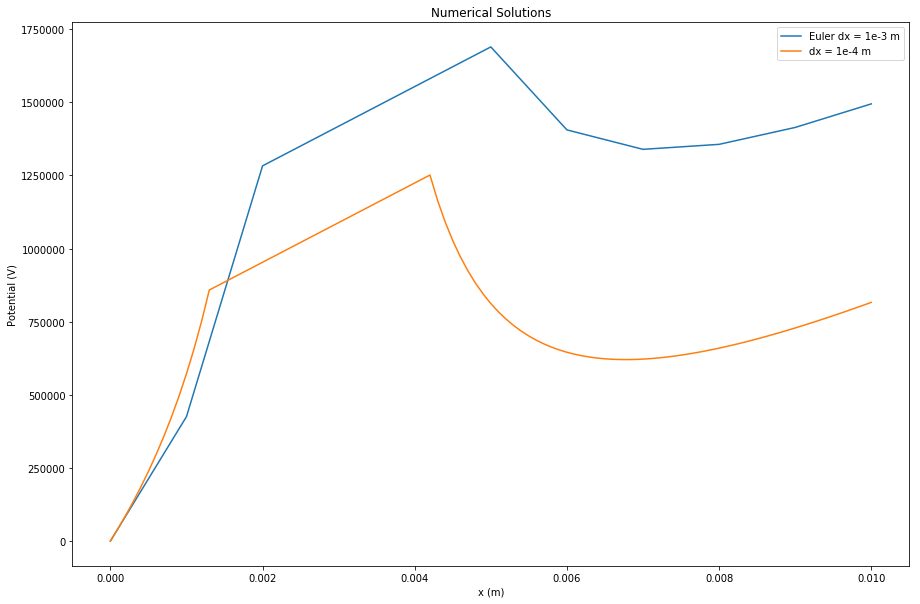

In [20]:
plt.figure(figsize = (15,10))
plt.plot(x,V, label = 'Euler dx = 1e-3 m')
plt.plot(x2, V2, label = 'dx = 1e-4 m')
plt.xlabel('x (m)')
plt.ylabel('Potential (V)')
plt.title('Numerical Solutions')
plt.legend()


# Now for finding the analytical solution.
The potential between the two plates will be
\begin{equation}
V(x) = \frac{\sigma}{\epsilon_0}x
\end{equation}
As a sanity check if we take the negative derivative we get back the electric field we should have. 

For a spherical shell of charge the potential is normally set to be zero at infinity, so if we look at the inegral form of the potential 
\begin{align}
	V(x) - V(-\infty) &= -\int_{-\infty}^{x} E_L(y) dy \\
	 V(x) &= -\int_{-\infty}^{x} \frac{-k Q}{(a-y)^2} dy \\
	 V(x) &= \frac{k Q}{(a-x)}
\end{align}
Where we've used the Electric field to the left of the sphere. Once inside the sphere the potential should be constant in the sphere,
\begin{equation}
V_{in} = \frac{k Q}{(a-R)}
\end{equation}
Then to the right of the sphere the potential will be,
\begin{align}
	V(\infty) - V(x)_R &= -\int_{x}^{\infty} E_R(y) dy \\
	 -V(x) &= -\int_{x}^{\infty} \frac{k Q}{(y-a)^2} dy \\
	 V(x) &= -\frac{k Q}{(a-x)}
\end{align}

In [10]:
# %load V_plate.py
def V_plate(x):
    """
    Finds the 1d electric field from parallel plates with uniform charge density
    sigma

    Inputs
    ----------
    x:  Place where I want to find the electric field

    Outputs
    ----------
    E:  Electric field at point x (N/C)
    """
    d = 1e-2 #Distacne between the plates
    eps0 = 8.854187817e-12 #Permittivity constant (F/m)
    sigma = 1.2e-3 #Charge density (C/m^2)
    return sigma*x/eps0


In [11]:
# %load V_sphere.py
def V_sphere(x):
    """
    Finds the 1d electric field from a shell of charges

    Inputs
    ----------
    x:  Place where I want to find the electric field

    Outputs
    ----------
    E:  Electric field at point x (N/C)
    """
    a = 0.273e-2    #Where the center of the sphere is located
    R = 0.146e-2    #Radius of the sphere
    Q = 0.24e-6     #Charge on the spherical shell
    d = 1e-2        #End of the region I care about
    k = 9e9        #Coulomb constant (N*m**2 / C**2)
    if x <= a - R:  #Left of the sphere
        return k * Q / (a-x)
    elif x >= a + R:#Right of the sphere
        return -k * Q / (a-x)
    else:           #In the sphere
        return k * Q / (R)


In [12]:
# %load V_total.py
def V_total(x):
    """
    Total potential from the plates and the sphere
    """
    
    return V_sphere(x) + V_plate(x) - (V_sphere(0) + V_plate(0))


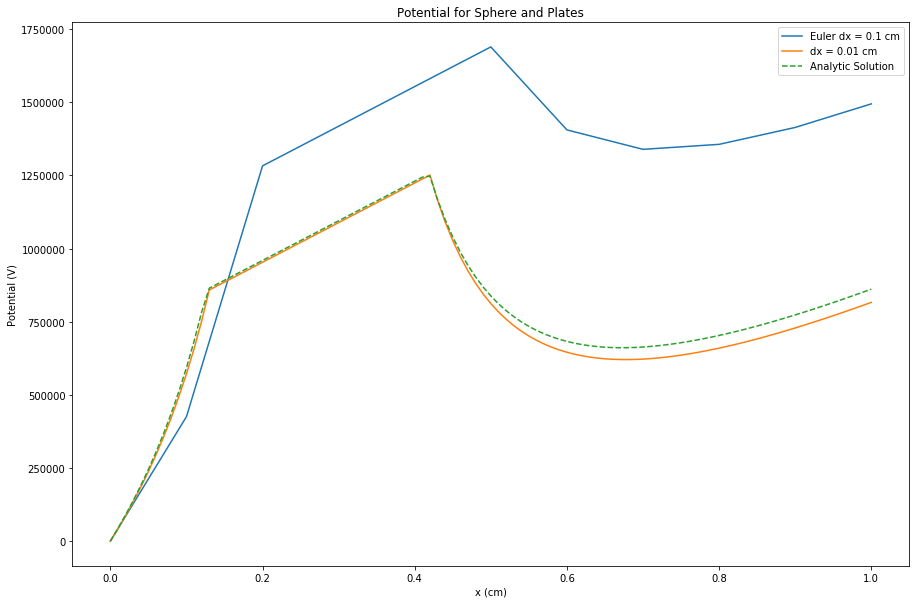

In [24]:
x, V = euler_1d(0, 0, 1e-2, 1e-3, dVdx )
x2, V2 = euler_1d(0, 0, 1e-2, 1e-4, dVdx )

plt.figure(figsize = (15,10))
plt.plot(x*100,V,label = 'Euler dx = 0.1 cm')
plt.plot(x2*100, V2, label = 'dx = 0.01 cm')
V3 = []
for i in x2:
    V3.append(V_total(i))
plt.plot(x2*100, V3, '--', label = 'Analytic Solution')

plt.xlabel('x (cm)')
plt.ylabel('Potential (V)')
plt.title('Potential for Sphere and Plates')
plt.legend()
plt.show()